# MlFlow implementation for autogluon
**Objetive:** track and registre autogluon predictors using mlflow

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import helper_plot_functions as hpf
import helper_model_functions as hmf
import importlib


try:
    importlib.reload(hpf)
except Exception as e: 
    print(f'Error reloading module: {e}')

/Users/delfosg/Documents/aoutgluon-mlflow-integration/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Initialize experiment variables

In [2]:
# init
target_var = "charges"
preset_mode = 'medium_quality'
time_limit = 60 * 10 # 10 minutes in seconds
outlier_drop = True
autogluon_path = f'./{target_var}_autogluon/{preset_mode}'

init_values = {
    'target_var': target_var,
    'preset_mode': preset_mode,
    'time_limit': time_limit,
    'outlier_drop': outlier_drop,
    'autogluon_path': autogluon_path
}

display(init_values)


{'target_var': 'charges',
 'preset_mode': 'medium_quality',
 'time_limit': 600,
 'outlier_drop': True,
 'autogluon_path': './charges_autogluon/medium_quality'}

# Load Data

In [ ]:
# Download data from KaggleHub 
path = kagglehub.dataset_download("mirichoi0218/insurance")
df = pd.read_csv(path + "/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Quick EDA

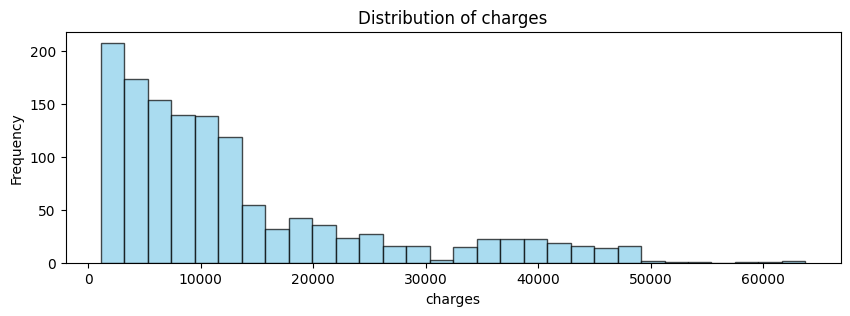

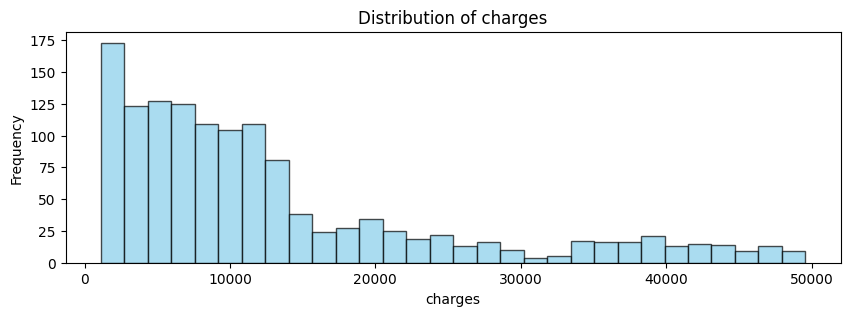

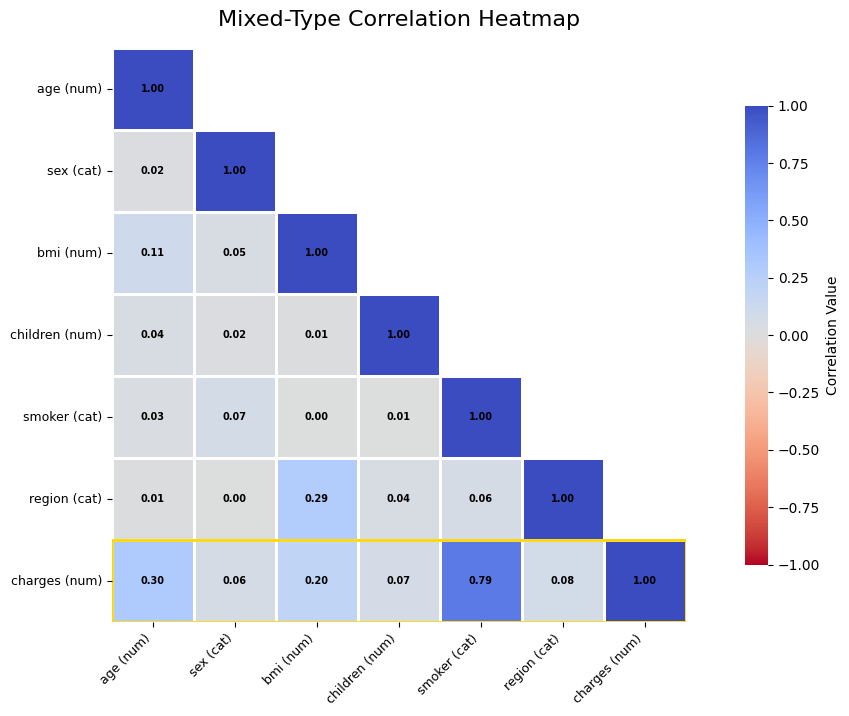

Original Shape: (1338, 7)
Outlier Drop Shape: (1331, 7)


In [4]:
hpf.get_target_distribution(df, target_var)
hpf.get_target_distribution(hmf.get_outlier_drop(df,target_var), target_var)
hpf.mixed_correlation_heatmap(df, annot=True, encode=False, target=target_var, figsize=(12,7.1))

print('Original Shape:', df.shape)
print('Outlier Drop Shape:', hmf.get_outlier_drop(df, target_var).shape)

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
